Projeto Eletromag Etapa 1

Imports dos módulos

In [2]:
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Variáveis do Transformador

In [70]:
R1 = 0.2
R2 = 0.2
L1 = 310e-6
L2 = 310e-6
C1 = 1e-6
C2 = 1e-6
w=1/sqrt(L1*C1)
f = 1/(2*pi*sqrt(L1*C1))
k = 0.1

In [71]:
XL1 = 1j*w*L1
XL2 = 1j*w*L2
XC1=1/(1j*w*C1)
XC2=1/(1j*w*C2)
M = k*sqrt(L1*L2)
XM = 1j*w*M
Uf = 5

In [72]:
def CalcularTransformador(V1, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+((Rc*XC2)/(Rc+XC2))]])
    V=np.array([V1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [73]:
def S(V:complex, I:complex):
    """
    Calcula a potência total S do componente/sistema

    Parâmetros:
    - V: Tensão que passa no componente/sistema
    - I: Corrente que passa no componente/sistema
    - Z: Impedância local
    """

    Vpico = abs(V)
    Ipico = abs(I)
    Veficaz = Vpico/sqrt(2)
    Ieficaz = I/sqrt(2)
    Ief_conj = Ieficaz.conjugate()

    # print(f'Vef = {prettyPolar(Veficaz)}')
    # print(f'Ief = {prettyPolar(Ieficaz)}')
    # print(f'Ief_conj = {prettyPolar(Ief_conj)}')


    S = Veficaz*Ief_conj

    return S

In [74]:
Uf = 5
Rc = 10

#A função calcula as duas correntes
i1, i2 = CalcularTransformador(Uf, Rc)


#Com as correntes, é possível calcular o V2 
V2 = ((XC2*Rc)/(XC2+Rc)) * i2

#Potência 

S2=S(V2,i2)


print("Corrente no primario (i1)          --> {0:.5f} A".format(abs(i1)))
print("Corrente no secundário (i2)        --> {0:.5f} A".format(abs(i2)))
print("Tensão no secundário (V2)          --> {0:.5f} V".format(abs(V2)))
print("Potência eficaz (S2ef)             --> {0:.5f} W".format(S2.real))
print("Frequência de ressonância (f)      --> {0:.5f} Hz".format(f.real))


Corrente no primario (i1)          --> 14.37404 A
Corrente no secundário (i2)        --> 1.64236 A
Tensão no secundário (V2)          --> 14.28099 V
Potência eficaz (S2ef)             --> 5.82512 W
Frequência de ressonância (f)      --> 9039.39334 Hz


Gráfico de Î1 e Î2 em função da frequência

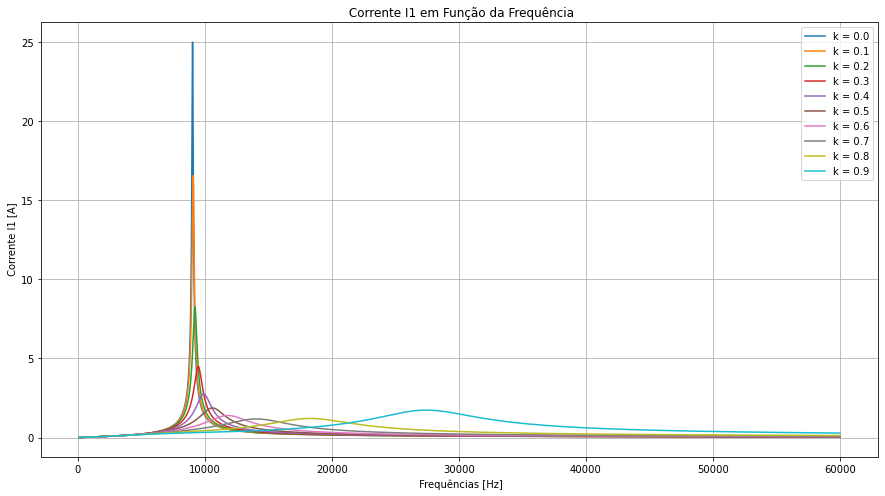

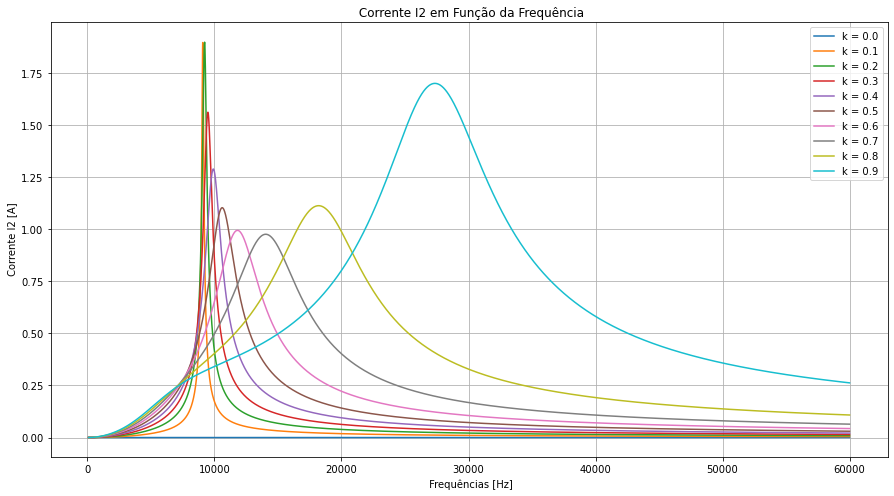

In [75]:
lista_k = np.arange(0,1,0.1)
lista_f = np.arange(100,60e3,10)


def ListaI1I2(lista_f,lista_k):
    I1=[]
    I2=[]
    for f in lista_f:
        
        M = lista_k*sqrt(L1*L2)
        w = 2*pi*f
        XL1 = 1j * w * L1
        XL2 = 1j * w * L2
        XM = 1j * w * M
        XC1 = 1/(1j*w*C1)
        XC2 = 1/(1j*w*C2)

        Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2)/(Rc+XC2)]])
        V=np.array([Uf,0])
        I=np.dot(linalg.inv(Z),V)

       
        I1.append(abs(I[0]))
        I2.append(abs(I[1]))

    return I1,I2

picosI1=[]


plt.figure(figsize=(15,8))
for k in lista_k:
    I1, I2 = ListaI1I2(lista_f,k)
    maximo=max(I1)
    picosI1.append(maximo)
    plt.plot(lista_f,I1,label="k = {0:.1f}".format(k))
    plt.title(" Corrente I1 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Corrente I1 [A]")
    plt.legend()

# ax=plt.gca()
# ax.set_xlim([200, 700])
plt.grid()
plt.show() 
picosI2=[]

plt.figure(figsize=(15,8))
for k in lista_k:
    I1, I2 = ListaI1I2(lista_f,k)
    maximo=max(I2)
    picosI2.append(maximo)
    plt.plot(lista_f,I2,label="k = {0:.1f}".format(k))
    plt.title(" Corrente I2 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Corrente I2 [A]")
    plt.legend()
    
# ax=plt.gca()
# ax.set_xlim([200, 800])
plt.grid()
plt.show() 


Gráfico de Picos da Corrente Î1

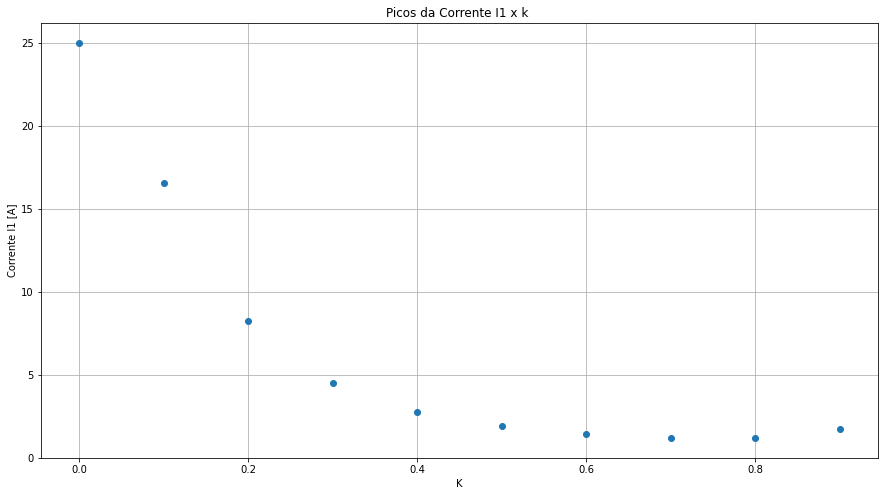

In [76]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosI1,"o")
plt.title("Picos da Corrente I1 x k ")
plt.xlabel("K")
plt.ylabel("Corrente I1 [A]")
plt.grid()
plt.show()

Gráfico de Picos da Corrente Î2

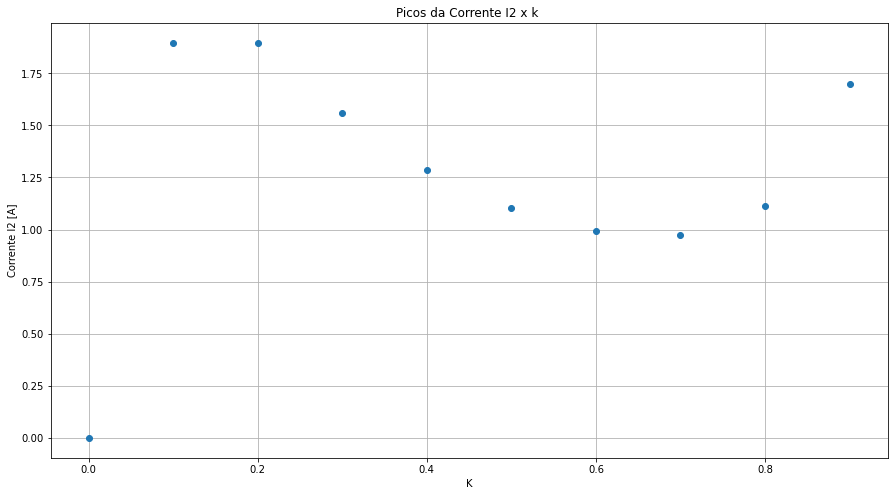

In [77]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosI2,"o")
plt.title("Picos da Corrente I2 x k ")
plt.xlabel("K")
plt.ylabel("Corrente I2 [A]")
plt.grid()
plt.show()

Gráfico da Potencia S1 em Funcão da Frequência

In [78]:
def ListaI1I2S1S2(lista_f,lista_k):
    I1=[]
    I2=[]
    S1=[]
    S2=[]
    for f in lista_f:
        M = lista_k*sqrt(L1*L2)
        w = 2*pi*f
        XL1 = 1j * w * L1
        XL2 = 1j * w * L2
        XM = 1j * w * M
        XC1 = 1/(1j*w*C1)
        XC2 = 1/(1j*w*C2)

        Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2)/(Rc+XC2)]])
        V=np.array([Uf,0])
        I=np.dot(linalg.inv(Z),V)
        
        i1,i2=I[0],I[1]
        
        Zeq=(Rc*XC2)/(Rc+XC2)
        
        V2 = i2 * Zeq
        
        IRc = V2/Rc
        
        S1ef = (Uf * i1.conjugate())/2
        S2ef = (V2 * IRc.conjugate())/2

       
        I1.append(abs(i1))
        I2.append(abs(i2))
        S1.append(S1ef.real)
        S2.append(S2ef.real)
        

    return I1,I2,S1,S2



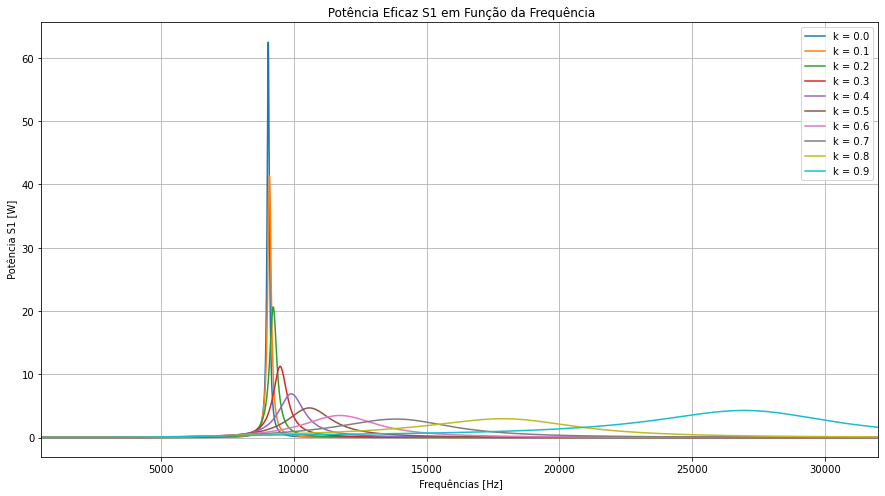

In [86]:
plt.figure(figsize=(15,8))
picosS1=[]
for k in lista_k:
    I1, I2, S1ef, S2ef = ListaI1I2S1S2(lista_f,k)
    maximo=max(S1ef)
    picosS1.append(maximo)
    plt.plot(lista_f,S1ef,label="k = {0:.1f}".format(k))
    plt.title(" Potência Eficaz S1 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Potência S1 [W]")
    plt.legend()

ax=plt.gca()
ax.set_xlim([500, 32000])
plt.grid()
plt.show() 

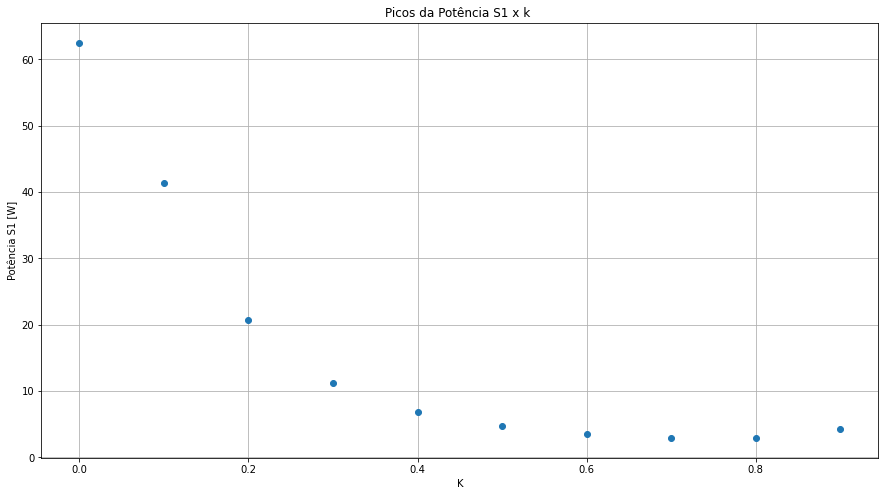

In [80]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosS1,"o")
plt.title("Picos da Potência S1 x k ")
plt.xlabel("K")
plt.ylabel("Potência S1 [W]")
plt.grid()
plt.show()

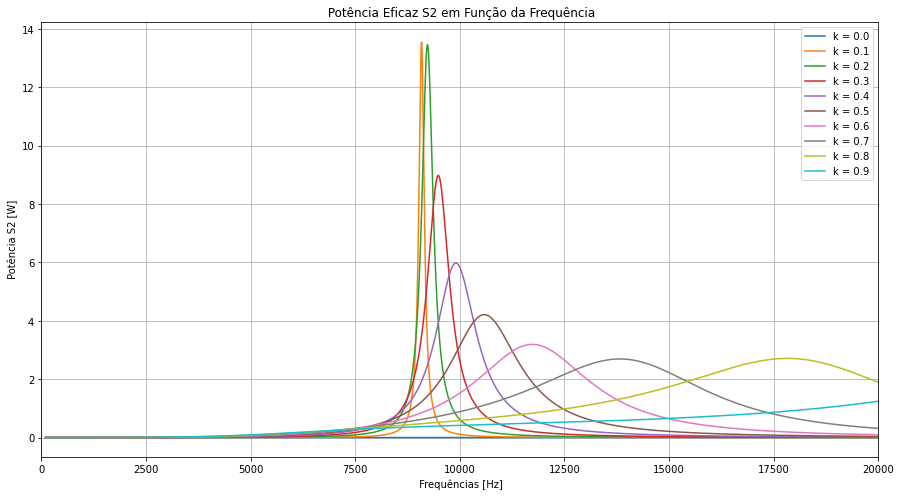

In [81]:
plt.figure(figsize=(15,8))
picosS2=[]
for k in lista_k:
    I1, I2, S1ef, S2ef = ListaI1I2S1S2(lista_f,k)
    maximo=max(S2ef)
    picosS2.append(maximo)
    plt.plot(lista_f,S2ef,label="k = {0:.1f}".format(k))
    plt.title(" Potência Eficaz S2 em Função da Frequência")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Potência S2 [W]")
    plt.legend()

ax=plt.gca()
ax.set_xlim([0, 2e4])
plt.grid()
plt.show() 

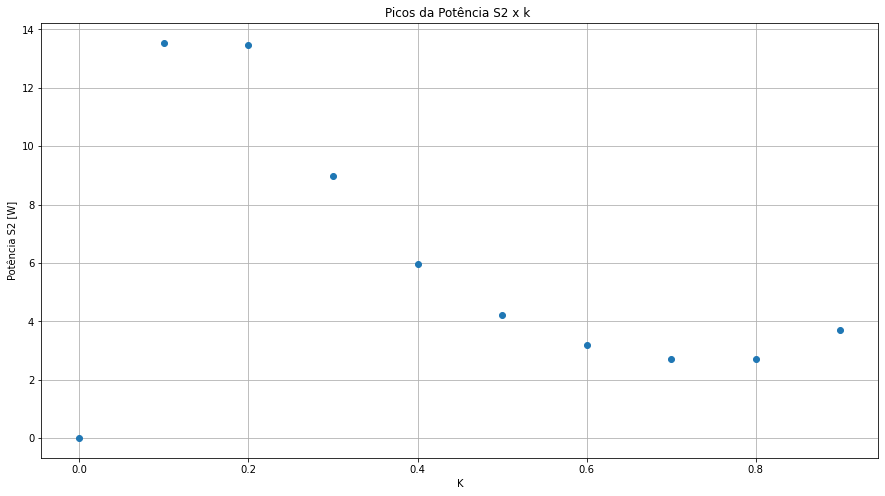

In [87]:
plt.figure(figsize=(15,8))
plt.plot(lista_k,picosS2,"o")
plt.title("Picos da Potência S2 x k ")
plt.xlabel("K")
plt.ylabel("Potência S2 [W]")
plt.grid()
plt.show()

Gráfico de V2 por valores de K

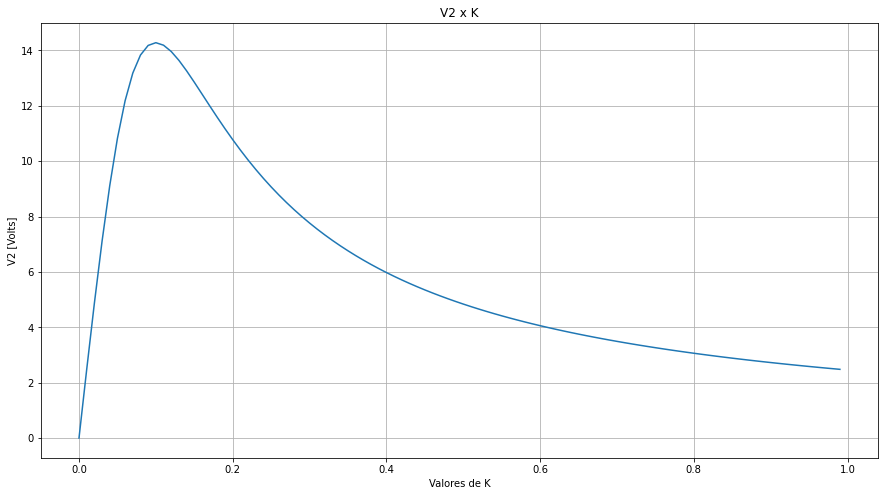

In [88]:
espacos = np.arange(0,1, 0.01)
V2 = []
plt.figure(figsize=(15,8))
for k in espacos:
    M = k*sqrt(L1*L2)
    XM = 1j * w * M
    
    i1, i2 = CalcularTransformador(Uf, Rc)
    zeq=(XC2*Rc)/(XC2+Rc)
    v2 = zeq * i2
    V2.append(abs(v2))
    
plt.plot(espacos,V2)
plt.title("V2 x K")
plt.xlabel("Valores de K")
plt.ylabel("V2 [Volts]")
plt.grid()
plt.show()

Gráfico de Eficiencia

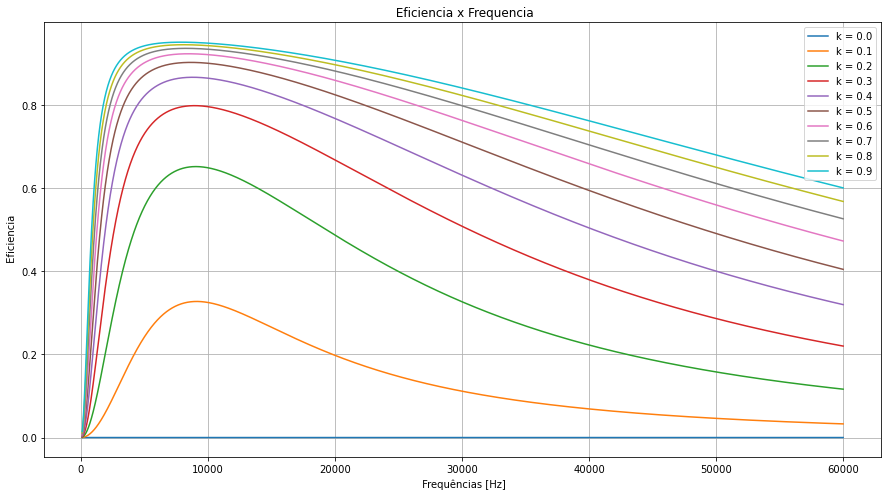

In [89]:
plt.figure(figsize=(15,8))

for k in lista_k:
    I1, I2, S1ef, S2ef = ListaI1I2S1S2(lista_f,k)
    rendimento=[]
    for i in range(len(S2ef)):
        n = S2ef[i]/S1ef[i]
        rendimento.append(n)
    plt.plot(lista_f,rendimento,label="k = {0:.1f}".format(k))
    plt.title(" Eficiencia x Frequencia")
    plt.xlabel(" Frequências [Hz]")
    plt.ylabel(" Eficiencia")
    plt.legend()


plt.grid()
plt.show() 

In [92]:
f.real

9039.39334079601